___

# (I can't get no) satisfaction

Ziel dieser Kurseinheit ist es, Erfahrung mit der Datenmodellierung für dokument-orientierte und spalten-orientierte Datenbanksysteme (im Vergleich zu relationalen Systemen) zu sammeln.

## Module und Umgebunsvariablen laden

Wie bereits in KE1 beschrieben, werden zunächst zwei Umgebungsvariablen Variablen angelegt, auf die im Verlauf dieser Kurseinheit zugegriffen wird. 

In [1]:
# Load neccessary python libraries
import os
import iplantuml
import plantuml

In [9]:
# Absolute path to the folder cotaining the git repo
host_repo_path =  "C:/Users/maayo/PycharmProjects/PAndasTutorial"
#host_repo_path =  "../../workspace"

# Relative path to the folder containing following files (INSIDE OF THE WORKSPACE FOLDER!):
#   employees_satisfaction_transformed.csv
#   departments.csv
#   projects.csv
workspace_data_path = host_repo_path+"/KEs_uebungen/data/subfolder"

os.environ['HOST_DATA_PATH'] = os.path.join(host_repo_path, "workspace", workspace_data_path)
os.environ['DATA_PATH'] = os.path.join("/home/pyspark-client/workspace/", workspace_data_path)
os.environ
path_to_df = os.environ['DATA_PATH']+"/employees_satisfaction_transformed.csv"
path_to_df

'C:/Users/maayo/PycharmProjects/PAndasTutorial/KEs_uebungen/data/subfolder/employees_satisfaction_transformed.csv'

##  Datenmodellierung

Wir beginnen mit einer Analyse der zur Verfügung stehenden Dateien bzw. Daten, die in die verschiedenen Datenbanksysteme importiert werden sollen.

Neben der bereits verwendeten Datei:

- *employees_satisfaction_transformed.csv*

_error: '''It seems like you are trying to run a shell command to show the first line of a file named `employees_satisfaction_transformed.csv` 
located in the directory specified by the environment variable `DATA_PATH`. 
The command returned a non-zero exit status, which indicates that an error occurred. 
There could be several reasons for this error, such as the file not existing, 
the `DATA_PATH` environment variable not being set, 
or not having the necessary permissions to read the file. 
You may want to check these potential issues and try running the command again.'''_


In [10]:
%%bash

# Show the headline from file "employees_satisfaction_transformed.csv"
printf "\n## Employee columns\n"
head -1 ${DATA_PATH} /employees_satisfaction_transformed.csv


## Employee columns


head: cannot open 'path_to_df' for reading: No such file or directory


CalledProcessError: Command 'b'\n# Show the headline from file "employees_satisfaction_transformed.csv"\nprintf "\\n## Employee columns\\n"\nhead -1 path_to_df\n'' returned non-zero exit status 1.

werden zwei weitere Dateien bereitgestellt:

- *departments.csv*

- *projects.csv*

In [ ]:
%%bash

# Show the headline from file "departments.csv"
printf "\n## Department columns:\n"
head -1 ${DATA_PATH}/departments.csv

# Show the headline from file "projects.csv"
printf "\n## Project columns\n"
head -1 ${DATA_PATH}/projects.csv

> *HINWEIS:* Die Binärdaten der Bilddateien (*Projects.proj_image*) sind base64 encodiert!



<div class="alert alert-block alert-info">
    
**Aufgabe 1**    

Erstellen Sie zunächst ein Klassen-Diagramm, das die Struktur bzw. das Schema der vorhandenen Daten darstellt (Eine Klasse je CSV-Datei). Heben Sie insbesondere Primär- und Fremd-Schlüsselattribute hervor (fett) und Markieren Sie farblich (fett und rot) die in den vorliegenden Daten fehlenden Schlüsselattribute die für die nachfolgend aufgelisteten Beziehungen notwendig sind. Es ist ebenfalls sinnvoll eine Analyse der Datentypen (string, int, float) der vorhandenen Werte vorzunehmen und diese ebenfalls darzustellen.
</div>


Folgende Beziehungen sind in den Daten vorhanden bzw. sollen modelliert werden:

- Ein Department hat mehrere Projekte, aber ein Projekt ist immer genau einem Department zugeordnet
- Ein Department hat viele Mitarbeiter, aber ein Mitarbeiter ist nur einem Department zugeordnet



> *HINWEIS:* Für die Modellierung verwenden wir PlantUML innerhalb der Jupyter-Notebook-Zellen. Eine Dokumentation zu PlantUML ist unter folgender URL zu finden: [https://plantuml.com/class-diagram](https://plantuml.com/class-diagram)

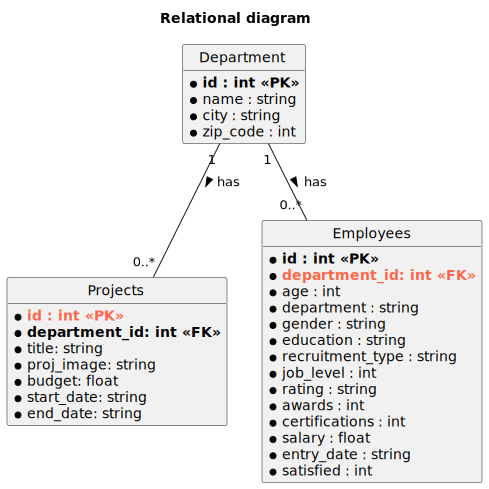

In [3]:
%%plantuml
@startuml

title Relational diagram
hide circle
hide members
show fields

class "Department" as d {
    * **id : int <<PK>>**
    * name : string
    * city : string
    * zip_code : int
}

class "Projects" as p{
   * <color:Tomato>**id : int <<PK>>**</color>
   * **department_id: int <<FK>>**
   * title: string
   * proj_image: string
   * budget: float
   * start_date: string
   * end_date: string
}

class "Employees" as e {
   * **id : int <<PK>>**
    * <color:Tomato>**department_id: int <<FK>>**</color>
    * age : int
    * department : string
    * gender : string
    * education : string
    * recruitment_type : string
    * job_level : int
    * rating : string
    * awards : int
    * certifications : int
    * salary : float
    * entry_date : string
    * satisfied : int
}

d "1" -- "0..*" e : has >
d "1" -- "0..*" p : has >



@enduml

## PostgreSQL    

Im Folgenden sollen die vorhandenen Daten zunächst in ein relationales Datenbanksystem - in diesem Fall PostgreSQL - importiert werden.

<div class="alert alert-block alert-info">
    
**Aufgabe 2**    
    
Bilden Sie das in Aufgabe 1 aus den vorhandenen Daten extrahiert Modell jetzt geeignet auf das relationale Datenmodell ab (pysisches Modell). Hierbei muss im Sinne einer Normalisierung kein weitere Aufteilung der Tabellen vorgenommen werden. Markieren Sie ebenfalls wieder farblich für die Modellierung notwendigen Attribute, die in den vorhandenen Daten fehlen. Kennzeichnen Sie ebenfalls redundante Attribute die Sie an dieser Stelle entfernen würden. 
</div>



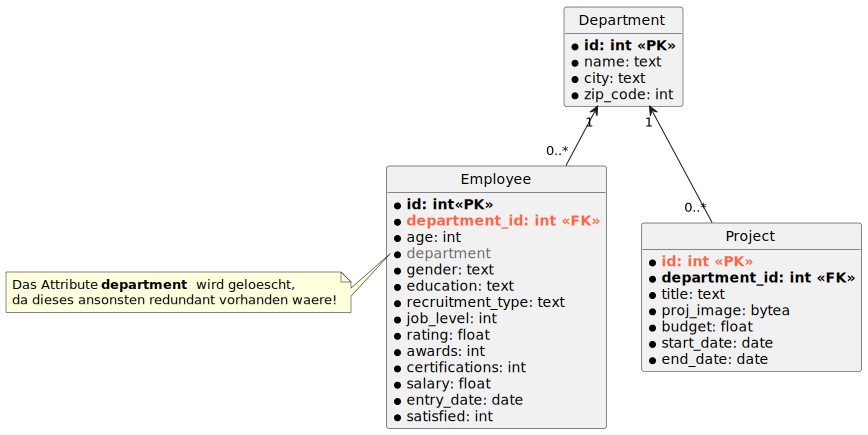

In [4]:
%%plantuml
@startuml

hide circle
hide members
show fields

class "Department" as d {
    * **id: int <<PK>>**
    * name: text
    * city: text
    * zip_code: int
}

class "Project" as p {
    * <color:Tomato>**id: int <<PK>>**</color>
    * **department_id: int <<FK>>**
    * title: text
    * proj_image: bytea
    * budget: float
    * start_date: date
    * end_date: date 
}

class "Employee" as e {
    * **id: int<<PK>>**
    * <color:Tomato>**department_id: int <<FK>>**</color>
    * age: int
    * <color:DimGrey>department</color>
    * gender: text
    * education: text
    * recruitment_type: text
    * job_level: int
    * rating: float
    * awards: int
    * certifications: int
    * salary: float
    * entry_date: date
    * satisfied: int
}

note left of e::<color:DimGrey>department</color>
    Das Attribute **department** wird geloescht, 
    da dieses ansonsten redundant vorhanden waere!
end note


d "1" <-- "0..*" e
d "1" <-- "0..*" p
   
@enduml

### Data Preparation   

$$ \\ $$

<div class="alert alert-block alert-info">

**Aufgabe 3**
    
Nehmen Sie an dieser Stelle für den Import möglicherweise notwendige Änderungen an den Daten vor. Es steht Ihnen frei dies mithilfe von Bash-Tools, Python-Skripten oder sonstigen Werkzeugen umzusetzen. 

Beschreiben Sie außerdem nachvollziehbar - mit Kommentaren im Code oder Markdown-Zellen - welche Änderungen Sie vornehmen und wieso Sie diese vornehmen.
</div>



**Lösung:**
1. Der Header wird aus den CSV-Dateien entfernt. Dies erleichtern den späteren Import in MongoDB mithilfe von mongoimport. Die Header werden zusätzlich in einer Textdatei abgelegt.
2. Beim Import nach PostgreSQL kommt es zu einem Fehler, da die Spalte *rating* in der Datei employees_satisfaction_transformed.csv* strings und numerische Werte enthält. Muss korrigiert werden.

**1. Header entfernen:**

In [ ]:
%%bash

## move csv header to extra file
head -1 ${DATA_PATH}/employees_satisfaction_transformed.csv > \
${DATA_PATH}/employees_satisfaction_transformed-header.txt

head -1 ${DATA_PATH}/projects.csv > \
${DATA_PATH}/projects-header.txt

head -1 ${DATA_PATH}/departments.csv > \
${DATA_PATH}/departments-header.txt

## and remove the header from file
tail -n +2 ${DATA_PATH}/departments.csv > ${DATA_PATH}/tmp.csv && \
mv ${DATA_PATH}/tmp.csv ${DATA_PATH}/departments.csv

tail -n +2 ${DATA_PATH}/projects.csv > ${DATA_PATH}/tmp.csv \
&& mv ${DATA_PATH}/tmp.csv ${DATA_PATH}/projects.csv

tail -n +2 ${DATA_PATH}/employees_satisfaction_transformed.csv > ${DATA_PATH}/tmp.csv && \
mv ${DATA_PATH}/tmp.csv ${DATA_PATH}/employees_satisfaction_transformed.csv

**2. Fehler in Spalte "rating" korrigieren**

### Datenimport     


Starten Sie jetzt einen Docker-Container mit einer PostgreSQL-Datenbank, innerhalb des Docker-Netzwerks, in dem sich alle weiteren hier verwendeten Container befinden.

In [ ]:
%%bash

sudo docker run -d --rm \
--name dbis-postgres-db-1 \
--hostname dbis-postgres-db-1 \
-v "${HOST_DATA_PATH}:/mnt/workspace:ro" \
-e POSTGRES_PASSWORD=root \
-p 127.0.0.1:5432:5432 \
--network dbis-hadoop-cluster-network \
postgres:14.4

Vergewissern Sie sich, dass der Container läuft:

In [ ]:
%%bash

sudo docker ps --filter "name=dbis-postgres-db-1" --format "table {{.Names}}\t{{.Status}}"

<div class="alert alert-block alert-info">
    
**Aufgabe 4**    
    
Schreiben Sie ein SQL-Skript, das die notwendigen Schema-Strukturen anlegt, die CSV-Dateien einliest und entsprechend dem in Aufgabe 2 entworfenem Modell "Umstrukturierungen" vornimmt. Vervollständigen Sie hierzu das nachfolgende SQL-Skript.

Sie können natürlich auch abweichend alternative Methoden bzw. Tools verwenden. Der Python-Treiber für PostgreSQL ([psycopg](https://www.psycopg.org/psycopg3/docs/)) ist bereits installiert.
</div>


> *HINWEIS:* Der Import der Daten kann mehrere Minuten in Anspruch nehmen! Bezüglich der benötigten SQL-Aufrufe kann die Online-Dokumentation von PostgreSQL hilfreich sein (beispielsweise hinsichtlich des *COPY-FROM*-Befehls: [https://www.postgresql.org/docs/14/sql-copy.html](https://www.postgresql.org/docs/14/sql-copy.html)).


Codeauschnitt für die Verwendung des Python-Treibers (Verbindungsaufbau mit einer PostgreSQL-Datenbank mithilfe des *pscopg*-Python-Modules):

In [ ]:
import psycopg

postgres_conn = None
postgres_cursor = None
try:
    postgres_conn = psycopg.connect("host='dbis-postgres-db-1' dbname='satisfaction' user='postgres' password='root'")
    postgres_cursor = postgres_conn.cursor()
except psycopg.DatabaseError:
    print("No database connection!")

# ...

postgres_cursor.close()
postgres_conn.close()

Vorgegebener "Rahmen" des SQL-Skripts:

In [ ]:
%%bash

cat <<"EOF" | sudo docker exec -i dbis-postgres-db-1 psql -U postgres

DROP DATABASE IF EXISTS satisfaction;
CREATE DATABASE satisfaction;
\c satisfaction;


CREATE TABLE ... (

...

);

COPY 
    ...
FROM 
   '/mnt/workspace/file.csv'
WITH (
    FORMAT CSV,
    DELIMITER ',',
    HEADER false,
    NULL ''
);

...

EOF

### Datenbankabfragen    

$$ \\ $$

<div class="alert alert-block alert-info">
    
**Aufgabe 5**    
    
Schreiben Sie nun für nachfolgende Abfragen SQL-Statements und führen diese aus. Sie können entweder das vorgegebene SQL-Skript oder den Python-Treiber verwenden. Zu jeder Abfrage werden außerdem die Attribute angegeben, die jeweils ausgegeben werden sollen.
</div>

- **Q1. Anzahl Projekte pro Department**
    - Auszugebende Attribute: *Department.id, Department.name, Department.city, Department.zip_code, count_projects*
    - Erwartetes Ergebnis:


 id  |    name    |      city      | zip_code | count_projects 
-----|------------|----------------|----------|----------------
 101 | HR         | Frankfurt a.M. |    60306 |             85
 103 | Purchasing | München        |    80331 |            102
 104 | Sales      | Hamburg        |    21140 |             59
 105 | Technology | Berlin         |    10115 |            406
 102 | Marketing  | Berlin         |    10115 |            348
  

- **Q2. Durchschnittliche Dauer aller Projekte**
    - Auszugebende Attribute: *avg_project_duration_days*
    - Erwartetes Ergebnis:
    
|  avg_proj_duration_days |
|-------------------------|
|   932.6690000000000000  |
  
- **Q3. Durchschnittliche Projektdauer pro Department**
    - Auszugebende Attribute: *Department.id, Department.name, Department.city, Department.zip_code, avg_project_duration_days*
    - Erwartetes Ergebnis:   
  

 id  |    name    |      city      | zip_code | avg_proj_duration_days 
-----|------------|----------------|----------|------------------------
 101 | HR         | Frankfurt a.M. |    60306 |   992.2000000000000000
 103 | Purchasing | München        |    80331 |   993.4509803921568627
 104 | Sales      | Hamburg        |    21140 |   856.1864406779661017
 105 | Technology | Berlin         |    10115 |   946.0270935960591133
 102 | Marketing  | Berlin         |    10115 |   897.6954022988505747
 

- **Q4. Durchschnittliche Satisfaction pro Department**
    - Auszugebende Attribute: *Department.id, Department.name, Department.city, Department.zip_code, avg_satisfied*
    - Erwartetes Ergebnis:   


 id  |    name    |      city      | zip_code |     avg_satisfied      
-----|------------|----------------|----------|------------------------
 101 | HR         | Frankfurt a.M. |    60306 | 0.68867924528301886792
 103 | Purchasing | München        |    80331 | 0.70175438596491228070
 104 | Sales      | Hamburg        |    21140 | 0.80459770114942528736
 105 | Technology | Berlin         |    10115 | 0.74489795918367346939
 102 | Marketing  | Berlin         |    10115 | 0.64516129032258064516
    

- **Q5. Durchschnittliche Projektdauer des "Technology" Departments**
    - Auszugebende Attribute: *Department.id, Department.name, Department.city, Department.zip_code, avg_proj_duration_days*
    - Erwartetes Ergebnis:


 id  |    name    |  city  | zip_code | avg_proj_duration_days 
-----|------------|--------|----------|------------------------
 105 | Technology | Berlin |    10115 |   946.0270935960591133    


- **Q6. Satisfaction des "Technology" Departments**
    - Auszugebende Attribute: *Department.id, Department.name, Department.city, Department.zip_code, avg_satisfied*
    - Erwartetes Ergebnis:


 id  |    name    |  city  | zip_code |     avg_satisfied      
-----|------------|--------|----------|------------------------
 105 | Technology | Berlin |    10115 | 0.74489795918367346939



Vorgegebener "Rahmen" des SQL-Skripts für die Abfragen:

In [ ]:
%%bash
cat <<"EOF" | sudo docker exec -i dbis-postgres-db-1 psql -U postgres -d satisfaction

\qecho ******** Q1 ********
SELECT ... FROM ...


\qecho ******** Q2 ********
SELECT ... FROM ...

...

EOF

Abschließend kann der Datenbank-Container folgendermaßen wieder gestoppt werden (zu beachten gilt, dass aufgrund des `--rm` Flags der Container nach dem Stoppen automatisch gelöscht wird): 

In [ ]:
%%bash

# stop the postgresql docker container
if [ -z $(sudo docker ps --filter "name=dbis-postgres-db-1" -q) ]; then
    printf "\nthe container does not exist\n";
else 
    printf "\nstopping the container ...\n";
    sudo docker stop dbis-postgres-db-1
fi

## MongoDB    

Nachdem die zur Verfügung stehenden Daten in ein relationales Datenbanksystem importiert wurden, beschäftigen wir uns im Folgenden mit der Modellierung und Import bezüglich des dokument-orientierten Datenbanksystems MongoDB.

<div class="alert alert-block alert-info">
    
**Aufgabe 6**    
    
Bilden Sie das in Aufgabe 1 aus den vorhandenen Daten extrahiert Modell jetzt geeignet auf das Modell von MongoDB ab (inklusive Datentypen). Optimieren bzw. gestalten Sie das Modell so, dass für die geplanten Abfragen keine Joins benötigt werden ([*\$lookup*](https://www.mongodb.com/docs/manual/reference/operator/aggregation/lookup/))! Begründen Sie ihre Entscheidungen bezüglich des Schema-Designs (Einbettung, Referenzierung, Redundanz), wo dieses vom Modell aus Aufgabe 1 abweicht.
</div>


In [ ]:
%%plantuml --jar

@startuml

   
@enduml

### Datenimport    

Starten Sie jetzt eine MongoDB Datenbank innerhalb des Docker-Netzwerks in dem sich alle weiteren hier verwendeten Container befinden.

In [ ]:
%%bash

sudo docker run -d --rm \
--name dbis-mongo-db-1 \
--hostname dbis-mongo-db-1 \
-v "${HOST_DATA_PATH}:/mnt/workspace:ro" \
-e BROWSERSLIST_IGNORE_OLD_DATA=1 \
--network dbis-hadoop-cluster-network \
-p 127.0.0.1:27017:27017 \
mongo:5.0.5-focal

Vergewissern Sie sich wieder, dass der Container läuft:

In [ ]:
%%bash
sudo docker ps --filter "name=dbis-mongo-db-1" --format "table {{.Names}}\t{{.Status}}"

<div class="alert alert-block alert-info">
    
**Aufgabe 7**    
    
Importieren Sie die Daten nach MongoDB (schauen Sie sich diesbezüglich die Dokumentation zu [mongoimport](https://www.mongodb.com/docs/database-tools/mongoimport/) an). Achten Sie insbesondere auf die entsprechenden Datentypen.
    
Nehmen Sie außerdem bezüglich dem in Aufgabe 6 erstellten Modell notwendige "Umstrukturierungen" der Daten vor. Hierbei sind unterschiedliche Vorgehensweisen denkbar. Es können Beispielsweise die Daten zunächst so wie sie vorliegen in MongoDB importiert und anschließend durch entsprechende Aufrufe (*\$lookup*, *\$addFields*, *\$merge*, ...) umstrukturiert werden. Die Daten können natürlich auch vorher - beispielsweise mit Python - in die benötigte Struktur überführt und anschließend importiert werden.

Abweichend zu *mongoimport* kann hier auch der [*pymongo*](https://pymongo.readthedocs.io/en/stable/) Python-Treiber verwendet werden. Dieser ist ebenfalls bereits installiert.
</div>

Codeauschnitt für die Verwendung des Python-Treibers (Verbindungsaufbau mit einer Mongo-Datenbank mithilfe des *pymongo*-Python-Modules):

In [ ]:
from pymongo import MongoClient
from pprint import pprint

mongo_client = MongoClient('mongodb://dbis-mongo-db-1:27017/')
mongo_db = mongo_client['satisfaction']

pipeline = [
    # Mongo-pipeline
]
    
result = mongo_db['Project'].aggregate(pipeline)
pprint(list(q1_result)
       
mongo_client.close()

Vorgegebener "Rahmen" für die Verwendung von *mongoimport*:

In [ ]:
%%bash

## import a CSV-file with mongoimport
sudo docker exec -i dbis-mongo-db-1 mongoimport \
--drop \
--db=satisfaction \
--collection=... \
--type=csv \
--columnsHaveTypes \
--fields="_id.int32(),name.string(), ..." \
--file=/mnt/workspace/file.csv

### Datenbankabfragen    

<div class="alert alert-block alert-info">
    
**Aufgabe 8**    
    
Führen Sie nun wieder die vorgegeben Abfragen aus (siehe Aufgabe 5). Nochmals der Hinweis, dass keine Joins (*\$lookup*) verwendet werden sollen. Außerdem sollten *\$unwind*-Operationen möglichst vermieden werden.

Alternativ zu dem vorgegebenen Rahmen (Verwendung der Mongo-Shell) können Sie ebenfalls den *pymongo* Python-Treiber verwenden.
</div>

*Q1*. Anzahl Projekte pro Department 

Unter dem "Show Solution"-Button finden Sie als Einstiegshilfe einen Lösungsvorschlag zu Q1.

Mögliche Lösung zu Q1:
```js
db.Project.aggregate([   
        {
            $group: {
                _id: "$department_name",
                count_projects: {
                    $count: { }
                },
                city: { $first: "$department_city" },
                zip_code: { $first: "$department_zip_code" }
            }
        }
]);
```

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q1 ******** ");
db.X.aggregate([  

        ...
        
]);'

*Q2*. Durchschnittliche Projektdauer aller Projekte 

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q2 ******** ");

'

*Q3*. Durchschnittliche Projektdauer pro Department 

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q3 ******** ");

'

*Q4*. Durchschnittliche Sat. pro Department

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q4 ******** ");

'

*Q5.* Durchschnittliche Projektdauer des "Technology" Departments 

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q5 ******** ");

'

*Q6.* Satisfaction des "Technology" Departments

In [ ]:
%%bash

sudo docker exec -i dbis-mongo-db-1 mongosh satisfaction --quiet --eval \
'print("******** Q6 ******** ");

'

Der MongoDB-Container kann abschließend folgendermaßen wieder gestoppt werden:

In [ ]:
%%bash

# stop the mongodb docker container
if [ -z $(sudo docker ps --filter "name=dbis-mongo-db-1" -q) ]; then
    printf "\nthe container does not exist\n";
else 
    printf "\nstopping the container ...\n";
    sudo docker stop dbis-mongo-db-1
fi

## Cassandra

Abschließend, beschäftigen wir uns mit der Modellierung und Import bezüglich des spalten-orientierten Datenbanksystems Cassandra.

Machen sie sich hierzu zunächst mit der Daten-Modellierung in Cassandra vertraut (siehe: [https://cassandra.apache.org/doc/latest/cassandra/data_modeling/index.html](https://cassandra.apache.org/doc/latest/cassandra/data_modeling/index.html))

### Datenmodellierung    

<div class="alert alert-block alert-info">
    
**Aufgabe 9**    
    
Erstellen Sie ein *Chebotko logical data model* bezüglich der Datenbankabfragen *Q1, Q2, Q5, Q6* (siehe [https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_logical.html](https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_logical.html)). Beachten Sie dabei, dass wir jetzt - im Gegensatz zu der Modellierung und Import bei PostgreSQL und MongoDB - nur die in den Abfragen benötigten Attribute modellieren und importieren. Beachten Sie außerdem, dass wir im Gegensatzt zu dem in der Cassandra-Dokumentation verwendeten "Hotel-Beispiel" keinen Workflow zwischen den Abfragen haben und somit die "Tabellen" in unserem Diagramm auch nicht in Bezug zueinander stehen werden.
</div>



- **Q1.** Anzahl Projekte pro Department 
- **Q2.** Durchschnittliche Dauer aller Projekte 
- **Q5.** Durchschnittliche Projektdauer des "Technology" Departments 
- **Q6.** Durchschnittliche Employee satisfaction des "Technology" Departments 

In [ ]:
%%plantuml --jar

@startuml

hide members
hide circle
show fields

class **A**<Q1> {
a  **K**
b  **C↑**
c  **S**
}

class **B**<Q2> {
a  **K**
b  **C↑**
c
}

@enduml

<div class="alert alert-block alert-info">
    
**Aufgabe 10**    
    
Erstellen Sie jetzt ein *Chebotko physical data model*. Fassen Sie dabei, wenn möglich, Tabellen aus der logischen Modellierung (eine Tabelle je Abfrage) zusammen.
</div>

In [ ]:
%%plantuml --jar

@startuml


@enduml

### Datenimport

Starten Sie eine Cassandra Datenbank. Das hier verwendete Docker-Image beinhaltete bereits den DataStax Bulk Reader für einen effizienten Import von CSV-Dateien ([https://docs.datastax.com/en/dsbulk/docs/dsbulkAbout.html](https://docs.datastax.com/en/dsbulk/docs/dsbulkAbout.html)).

In [ ]:
%%bash

sudo docker run -d --rm \
--name dbis-cassandra-db-1 \
--hostname dbis-cassandra-db-1 \
-v "${HOST_DATA_PATH}:/mnt/workspace:ro" \
--network dbis-hadoop-cluster-network \
-p 127.0.0.1:7000:7000 \
registry.dbis-pro1.fernuni-hagen.de/pub-access/data-engineering-infrastructure/cassandra:4.0.4-dsbulk-1.10

Vergewissern Sie sich, dass der Docker-Container läuft:

In [ ]:
%%bash
sudo docker ps --filter "name=dbis-cassandra-db-1" --format "table {{.Names}}\t{{.Status}}"

<div class="alert alert-block alert-info">
    
**Aufgabe 11**    
    
Vervollständigen Sie jetzt das nachfolgende CQL-Skript für die Erzeugung des Schemas.
</div>


> *HINWEIS:* Es kann mehrere Minuten dauern, bis die Datenbank vollständig gestartet ist!


In [ ]:
%%bash

cat <<"EOF" | sudo docker exec -i dbis-cassandra-db-1 cqlsh

DROP KEYSPACE IF EXISTS satisfaction;
CREATE KEYSPACE satisfaction
    WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 1};

USE satisfaction;


...


DESCRIBE KEYSPACE satisfaction;

EOF

<div class="alert alert-block alert-info">
    
**Aufgabe 12**    
    
Erzeugen Sie zunächst die für den Import in Cassandra benötigten CSV-Dateien. Hier sind wieder unterschiedliche Vorgehensweisen denkbar. Beispielsweise haben wir die Daten bereits in PostgreSQL importiert und könnten diese durch den COPY-TO-Befehl in der benötigten Form exportierten. Es steht Ihnen an dieser Stelle ebenfalls wieder Frei auf welche Weise die Daten in die benötigte Struktur überführt und importiert werden. Der Python-Treiber für Cassandra ([*cassandra-driver*](https://docs.datastax.com/en/developer/python-driver/3.25/)) ist ebenfalls bereits installiert.
</div>


Ihre Lösung ...

Codeauschnitt für die Verwendung des Python-Treibers (Verbindungsaufbau mit einer Cassandra-Datenbank mithilfe des *cassandra-driver* Python-Modules):

In [ ]:
from cassandra.cluster import Cluster
from pprint import pprint

cassandra_cluster = Cluster(['dbis-cassandra-db-1'])
cassandra_session = cassandra_cluster.connect()
cassandra_session.set_keyspace('satisfaction')

cassandra_query = """
SELECT 
  ...
FROM 
  ...
"""

result_rows = cassandra_session.execute(cassandra_query)
pprint(list(result_rows))

cassandra_cluster.shutdown()

<div class="alert alert-block alert-info">
    
**Aufgabe 13**    
    
Importieren Sie die zuvor erzeugten CSV-Dateien mithilfe von DSBulk (falls kein abweichendes Vorgehen gewählt wurde).
</div>

In [ ]:
%%bash

sudo docker exec -i dbis-cassandra-db-1 dsbulk load \
--connector.name csv \
--connector.csv.url /mnt/workspace/file.csv \
--connector.csv.delimiter ',' \
--connector.csv.header true \
--schema.keyspace satisfaction \
--schema.table 'x_by_y' \
--schema.mapping '0 = x, 1 = y, 2 = z, ...' \
--log.directory /var/lib/cassandra/dsbulk_log \
--engine.dryRun false


### Datenbankabfragen    

<div class="alert alert-block alert-info">
    
**Aufgabe 14**    
    
Führen Sie die Abfragen jetzt auf Cassandra (CQL) aus.
Alternativ zu dem vorgegebenen Rahmen (Verwendung der CQL-Shell) können Sie ebenfalls das *cassandra-driver* Python-Modul verwenden.
</div>

Vorgegebener "Rahmen" für die Verwendung der CQL-Shell:

In [ ]:
%%bash
# --------------
## Q1
# --------------
printf "# ------------\n# Q1\n# ------------\n"
cat <<"EOF" | sudo docker exec -i dbis-cassandra-db-1 cqlsh -k satisfaction

SELECT 
  ...
FROM 
  ...

EOF

# --------------
## Q2
# --------------
printf "# ------------\n# Q2\n# ------------\n"
cat <<"EOF" | sudo docker exec -i dbis-cassandra-db-1 cqlsh -k satisfaction

SELECT 
  ...
FROM 
  ...

EOF


...



Der Cassandra-Container kann abschließend folgendermaßen gestoppt werden:

In [ ]:
%%bash

# stop the cassandra docker container
if [ -z $(sudo docker ps --filter "name=dbis-cassandra-db-1" -q) ]; then
    printf "\nthe container does not exist\n";
else 
    printf "\nstopping the container ...\n";
    sudo docker stop dbis-cassandra-db-1
fi

<div class="alert alert-block alert-info">
    
**Aufgabe 15**    
    
Beschreiben Sie, warum Abfragen wie *Q1* und *Q2* bei Cassandra zu Problemen führen könnten.
</div>

Ihre Lösung ...

<div class="alert alert-block alert-info">
    
**Aufgabe 16**    
    
Die empfohlene Größe für Partitionen in Cassandra beträgt 100.000 Cells. Berechnen Sie die Größe der aktuell größten Partition (siehe [https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_refining.html](https://cassandra.apache.org/doc/latest/cassandra/data_modeling/data_modeling_refining.html)). Welche Möglichkeiten bzw. Modellierungsstrategien bezüglich des Schema-Designs gibt es, um zu große Partitionen zu vermeiden?
</div>

Berechnung der *partition size*:

$$ N_v = N_r(N_c - N_{pk} − N_s) + N_s $$

$$ N_v = \text{Number of values (or cells)} $$
$$ N_s = \text{Number of static columns} $$
$$ N_r = \text{Number of rows} $$
$$ N_c = \text{Number of columns} $$
$$ N_{pk} = \text{Number of primary key columns} $$

Ihre Lösung ...

---
Der PDF-Export dieses Jupyter-Notebooks kann alternativ durch folgenden Aufruf erfolgen (Pfad zum Notebook muss entsprechend angepasst werden!):

In [ ]:
!jupyter nbconvert --to pdf --template '/home/pyspark-client/nbconvert-templates/fernuni-latex' \
~/workspace/PATH/TO/KE6-7.ipynb